In [1]:
pwd

'/Users/aidasaglinskas/Desktop/BC-FacExpr-1.2-fMRI-mainExp/scripts_python'

In [2]:
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance,ImageStat
import skvideo
import skvideo.io
import numpy as np
import os
from tqdm import tqdm
import cv2

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
def safe_mkdir(dir_name):
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

In [56]:
def load_video(fn):
    #videodata = skvideo.io.vread(fn,inputdict={'-pix_fmt' : 'yuv420p','-codec': 'h264', '-filter:v' : 'fps=20'})
    videodata = skvideo.io.vread(fn)
    return videodata

In [5]:
def save_video(videodata,ofn='outvideo.mp4'):
    # 20FPS, opens in quicktime
    skvideo.io.vwrite(ofn, videodata.astype(np.uint8),outputdict={'-pix_fmt' : 'yuv420p','-codec': 'h264', '-filter:v' : 'fps=20'})
    #skvideo.io.vwrite(ofn, videodata.astype(np.uint8),outputdict={'-codec': 'h264', '-filter:v' : 'fps=20'})
    #skvideo.io.vwrite(ofn, videodata.astype(np.uint8))

In [6]:
def return_frame2(img,enlarge=0):
    
    trained_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    #img = cv2.imread(image_fn)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cordinates = trained_data.detectMultiScale(gray_img)
    face_cordinates = face_cordinates + [-enlarge,-enlarge,enlarge*2,enlarge*2]
    
    return face_cordinates

def crop_video_to_rect2(video_data,x,y,h,w):
    return np.array([crop_frame_to_rect2(video_data[i,:,:,:],x, y, w, h) for i in range(video_data.shape[0])])

def crop_frame_to_rect2(img,x,y,h,w):
    return img[np.arange(y,y+h),:,:][:,np.arange(x,x+w),:]

def resize_video(video_data,vid_size_target=(512,512)):
    from PIL import Image, ImageEnhance,ImageStat
    import numpy as np
    
    #vid_size_target = np.array((512,512))
    vid_size_target = np.array(vid_size_target)
    vid_size = np.array((video_data.shape[1],video_data.shape[2]))
    nframes = video_data.shape[0]
    nchannels = video_data.shape[-1]
    video_data_new = np.zeros((nframes,vid_size_target[0],vid_size_target[1],nchannels))
    for f in range(nframes):
        video_data_new[f,:,:,:] = np.array(Image.fromarray(video_data[f,:,:,:]).resize(vid_size_target[-1::-1],Image.ANTIALIAS))
        
    return video_data_new

In [8]:
indir = '/Users/aidasaglinskas/Desktop/use_expressions_disfa/neutral/'
files = [os.path.join(indir,file) for file in os.listdir(indir) if all((file.endswith('.mp4'),not file.startswith('.')))]
print(len(files))
files.sort()
files[0:5]

34


['/Users/aidasaglinskas/Desktop/use_expressions_disfa/neutral/RightVideoSN003_comp_n1.mp4',
 '/Users/aidasaglinskas/Desktop/use_expressions_disfa/neutral/RightVideoSN003_comp_n2.mp4',
 '/Users/aidasaglinskas/Desktop/use_expressions_disfa/neutral/RightVideoSN003_comp_n3.mp4',
 '/Users/aidasaglinskas/Desktop/use_expressions_disfa/neutral/RightVideoSN005_comp_n1.mp4',
 '/Users/aidasaglinskas/Desktop/use_expressions_disfa/neutral/RightVideoSN005_comp_n2.mp4']

In [9]:
outdir = '/Users/aidasaglinskas/Desktop/use_expressions_disfa/neutral_cropped/'
safe_mkdir(outdir)

In [69]:
for vid_fn in tqdm(files): 
    ofn = os.path.join(outdir,vid_fn.split('/')[-1])
    if not os.path.exists(ofn):
        try:
            video_data = load_video(vid_fn)
            video_data = video_data[0:40,:,:,:]

            frame_rects = np.array([return_frame2(video_data[i,:,:,:],enlarge=0)[0] for i in range(video_data.shape[0])])
            mean_frame = frame_rects.mean(axis=0).astype(int)
            x, y, w, h = mean_frame
            video_data_cropped = crop_video_to_rect2(video_data,x,y,h,w)
            video_data_cropped = resize_video(video_data_cropped,vid_size_target=(512,512))

            save_video(video_data_cropped,ofn)
        except:
            print(f'passing on {vid_fn}')

100%|███████████████████████████████████████████| 34/34 [01:02<00:00,  1.85s/it]


In [46]:
for vid_fn in files:
    video_data = load_video(vid_fn)
    print(video_data.shape)

(41, 768, 1024, 3)
(92, 768, 1024, 3)
(241, 768, 1024, 3)
(41, 768, 1024, 3)
(201, 768, 1024, 3)
(212, 768, 1024, 3)
(41, 768, 1024, 3)
(141, 768, 1024, 3)
(181, 768, 1024, 3)
(221, 768, 1024, 3)
(192, 768, 1024, 3)
(61, 768, 1024, 3)
(241, 768, 1024, 3)
(192, 768, 1024, 3)
(201, 768, 1024, 3)
(41, 768, 1024, 3)
(232, 768, 1024, 3)
(172, 768, 1024, 3)
(141, 768, 1024, 3)
(241, 768, 1024, 3)
(262, 768, 1024, 3)
(41, 768, 1024, 3)
(148, 768, 1024, 3)
(77, 768, 1024, 3)
(84, 768, 1024, 3)
(132, 768, 1024, 3)
(282, 768, 1024, 3)
(282, 768, 1024, 3)
(221, 768, 1024, 3)
(92, 768, 1024, 3)
(193, 768, 1024, 3)
(262, 768, 1024, 3)
(81, 768, 1024, 3)
(192, 768, 1024, 3)


In [61]:
vid_fn = files[10]
video_data = load_video(vid_fn)
print(video_data.shape)

(192, 768, 1024, 3)


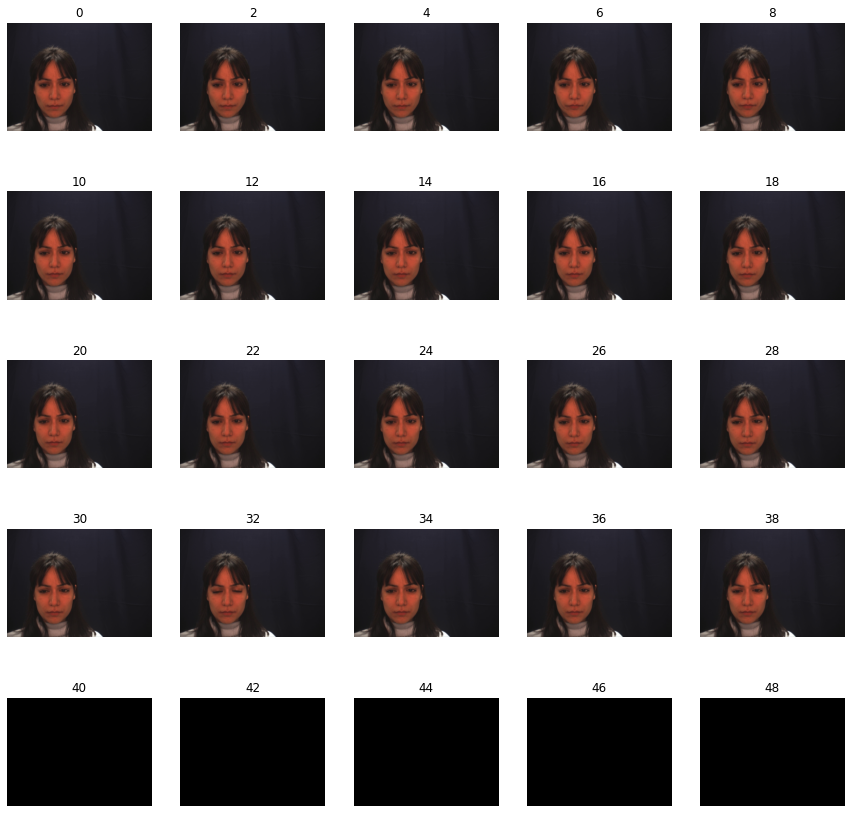

In [68]:
jj = np.arange(0,50,2)
plt.figure(figsize=(15,15))
cols = 5
rows = len(jj)/cols
rows = int(np.ceil(rows))

c = 0
for j in jj:
    c+=1
    plt.subplot(rows,cols,c)
    plt.imshow(video_data[j,:,:,:]);
    plt.axis('off');
    plt.title(j);
